# **Module 1 Homework**

In this homework, we're going to download finance data from various sources and make simple calculations/analysis.

---

## **Install**

In [7]:
# !pip install yfinance
# !pip install pandas_datareader

## **Imports**

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import time
from datetime import date

---
## **Question 1: [Macro] Average growth of GDP in 2023**

**What is the average growth (in %) of GDP in 2023?**

Download the timeseries Real Gross Domestic Product (GDPC1) from FRED (https://fred.stlouisfed.org/series/GDPC1).   
Calculate year-over-year (YoY) growth rate (that is, divide current value to one 4 quarters ago).   
Find the average YoY growth in 2023 (average from 4 YoY numbers).  
Round to 1 digit after the decimal point: e.g. if you get 5.66% growth => you should answer  5.7

In [8]:
gdpc = pdr.DataReader("GDPC1", "fred", start="2022-01-01")

In [9]:
gdpc['gdpc_us_yoy'] = gdpc.GDPC1/gdpc.GDPC1.shift(4)-1

In [10]:
gdpc.tail()

,GDPC1,gdpc_us_yoy
DATE,,
2022-10-01,21989.981,NaN
2023-01-01,22112.329,0.017179
2023-04-01,22225.350,0.023825
2023-07-01,22490.692,0.029269
2023-10-01,22679.255,0.031345


In [11]:
round(gdpc[-4:].gdpc_us_yoy.mean() * 100, 1)

2.5

---
## **Question 2. [Macro] Inverse "Treasury Yield"**

**Find the min value of (dgs10-dgs2) after since year 2000 (2000-01-01) and write it down as an answer, round to 1 digit after the decimal point.**  

Download DGS2 and DGS10 interest rates series (https://fred.stlouisfed.org/series/DGS2, https://fred.stlouisfed.org/series/DGS10).  
Join them together to one dataframe on date (you might need to read about pandas.DataFrame.join()), calculate the difference dgs10-dgs2 daily.  

(Additional: think about what does the "inverted yield curve" mean for the market and investors?  
Do you see the same thing in your country/market of interest?   
Do you think it can be a good predictive feature for the models?)

In [12]:
dgs2 = pdr.DataReader("DGS2", "fred", start="2000-01-01")

In [13]:
dgs10 = pdr.DataReader("DGS10", "fred", start="2000-01-01")

In [15]:
dgs2.tail()

,DGS2
DATE,
2024-04-17,4.93
2024-04-18,4.98
2024-04-19,4.97
2024-04-22,4.97
2024-04-23,4.86


In [14]:
dgs10.tail()

,DGS10
DATE,
2024-04-17,4.59
2024-04-18,4.64
2024-04-19,4.62
2024-04-22,4.62
2024-04-23,4.61


In [16]:
dgs_all = dgs2.join(dgs10, lsuffix='_dgs2', rsuffix='_dgs10')

In [17]:
dgs_all["diff"] = dgs_all.DGS10 - dgs_all.DGS2

In [18]:
dgs_all["diff"].min().round(1)

-1.1

---
## **Question 3. [Index] Which Index is better recently?**  

**Compare S&P 500 and IPC Mexico indexes by the 5 year growth and write down the largest value as an answer (%)**  

Download on Yahoo Finance two daily index prices for S&P 500 (^GSPC, https://finance.yahoo.com/quote/%5EGSPC/) and IPC Mexico (^MXX, https://finance.yahoo.com/quote/%5EMXX/).   

Compare 5Y growth for both (between 2019-04-09 and 2024-04-09).   
Select the higher growing index and write down the growth in % (closest integer %).   
E.g. if ratio end/start was 2.0925 (or growth of 109.25%), you need to write down 109 as your answer.  

(Additional: think of other indexes and try to download stats and compare the growth? Do create 10Y and 20Y growth stats. What is an average yearly growth rate (CAGR) for each of the indexes you select?)

In [19]:
sp500 = yf.download(tickers = ["^GSPC", "^MXX"],
                     start = "2019-04-09",
                     end = "2024-04-10",
                     interval = "1d")

[*********************100%%**********************]  2 of 2 completed


---
## **Question 4. [Stocks OHLCV] 52-weeks range ratio (2023) for the selected stocks**  


**Find the largest range ratio [=(max-min)/max] of Adj.Close prices in 2023**  


Download the 2023 daily OHLCV data on Yahoo Finance for top6 stocks on earnings (https://companiesmarketcap.com/most-profitable-companies/):   
2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM.

Here is the example data you should see in Pandas for "2222.SR": https://finance.yahoo.com/quote/2222.SR/history  

Calculate maximum-minimim "Adj.Close" price for each stock and divide it by the maximum "Adj.Close" value.  
Round the result to two decimal places (e.g. 0.1575 will be 0.16)  

(Additional: why this may be important for your research?)

In [20]:
sp500.loc["2024-04-09"]["Adj Close"] / sp500.loc["2019-04-09"]["Close"] - 1

Ticker
^GSPC    0.810128
^MXX     0.275062
dtype: float64

In [21]:
top_stocks = yf.download(tickers = ["2222.SR" ,"BRK-B" ,"AAPL" ,"MSFT" ,"GOOG" ,"JPM"],
                     start = "2023-01-01",
                     end = "2024-01-01",
                     interval = "1d")

[*********************100%%**********************]  6 of 6 completed


In [28]:
# max(
((top_stocks["Adj Close"].max() - top_stocks["Adj Close"].min()) / top_stocks["Adj Close"].max()).sort_values().round(2)
#)

Ticker
BRK-B      0.21
2222.SR    0.21
JPM        0.28
AAPL       0.37
GOOG       0.39
MSFT       0.42
dtype: float64

In [33]:
max(
((top_stocks["Adj Close"].max() - top_stocks["Adj Close"].min()) / top_stocks["Adj Close"].max()).sort_values().round(2)
)

0.42

---
## Question 5. [Stocks] Dividend Yield  
**Find the largest dividend yield for the same set of stocks**  

Use the same list of companies (2222.SR,BRK-B, AAPL, MSFT, GOOG, JPM) and download all dividends paid in 2023.  
You can use `get_actions()` method or `.dividends` field in yfinance library (https://github.com/ranaroussi/yfinance?tab=readme-ov-file#quick-start)  

Sum up all dividends paid in 2023 per company and divide each value by the closing price (Adj.Close) at the last trading day of the year.  

Find the maximum value in % and round to 1 digit after the decimal point.   
(E.g., if you obtained $1.25 dividends paid and the end year stock price is $100, the dividend yield is 1.25% -- and your answer should be equal to 1.3)

In [48]:
tickers = yf.Tickers(["2222.SR" ,"BRK-B" ,"AAPL" ,"MSFT" ,"GOOG" ,"JPM"])

In [54]:
# tickers = yf.Tickers('2222.SR JPM GOOG MSFT AAPL BRK-B')

tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

dividends_paid = {}
for tick in tickers:
    tick_info = yf.Ticker(tick)
    dividends = tick_info.dividends
    dividends_2023 = dividends.loc['2023']
    total_dividends = dividends_2023.sum()
    dividends_paid[tick] = total_dividends


closing_prices = {}
for tick in tickers:
    tick_data = yf.download(tick, end='2023-12-31')
    closing_prices[tick] = tick_data.loc[:,'Adj Close'].iloc[-1]


dividend_yield = {}
for tick in tickers:
    if closing_prices[tick] != 0: 
        dividend_yield[tick] = (dividends_paid[tick] / closing_prices[tick]) * 100
    else:
        dividend_yield[tick] = 0

print(round(max(dividend_yield.values()), 1))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

2.8


---
## **Question 6. [Exploratory] Investigate new metrics**  

**Free text answer**  

Download and explore a few additional metrics or time series that might be valuable for your project and write down why (briefly).

For enhancing the analytical depth of the project focused on time-driven strategies around earnings releases, several additional metrics or time series could provide valuable insights:


**Price-Earnings Ratio (P/E Ratio):**  
- The P/E ratio compares a company's current share price to its earnings per share (EPS).   
  It helps investors gauge whether a stock is undervalued or overvalued relative to its earnings.  
- By including P/E ratio data, we can analyze how the market perceives a company's earnings potential and 
  assess whether there's room for further price appreciation or  correction.  

<br>

**Volatility Metrics (e.g., Historical Volatility, Implied Volatility):**
- Volatility measures the degree of variation in a stock's price over time.   
  Historical volatility reflects past price movements, while implied volatility represents market expectations of future volatility.
- Including volatility metrics allows us to assess the level of risk associated with a stock leading up to its earnings release.   
  High volatility may indicate uncertainty or anticipation of significant price movements, presenting both opportunities and risks for traders.

<br>

**Relative Strength Index (RSI):**
- The RSI is a momentum oscillator that measures the speed and change of price movements.   
  It oscillates between 0 and 100 and is used to identify overbought or oversold conditions in a stock.
- Incorporating RSI data can help traders gauge the momentum behind a stock's price movement ahead of its earnings release.   
  A high RSI reading may suggest that a stock is overbought and due for a pullback, while a low RSI reading may indicate oversold conditions.

<br>

**Volume Metrics (e.g., Volume Oscillator, Volume Profile):**
- Volume measures the number of shares traded during a given period. Volume indicators provide insights into the level of market participation and the strength of price movements.
- Including volume metrics allows us to assess the level of investor interest and confidence leading up to an earnings release. High trading volume accompanying price movements may signal increased market conviction, while low volume may indicate lackluster interest or indecision.

<br>

**Analyst Recommendations and Sentiment Analysis:**
- Analyst recommendations and sentiment analysis provide insights into market sentiment and consensus views on a stock.
- Integrating data on analyst recommendations and sentiment analysis allows us to gauge market sentiment leading up to an earnings release.   
  Positive sentiment and bullish analyst recommendations may bolster investor confidence, while negative sentiment could signal caution or pessimism.

<br>

**Free cash flow**
- Purpose: Indicates business’s financial health and help to track progress, money that is left over after a business pays its operating expenses (OpEx)
- Sources: Cash flow statement, Balance sheet

<Axes: title={'center': 'TSLA -  Free Cash Flow [2020 -2023]'}>

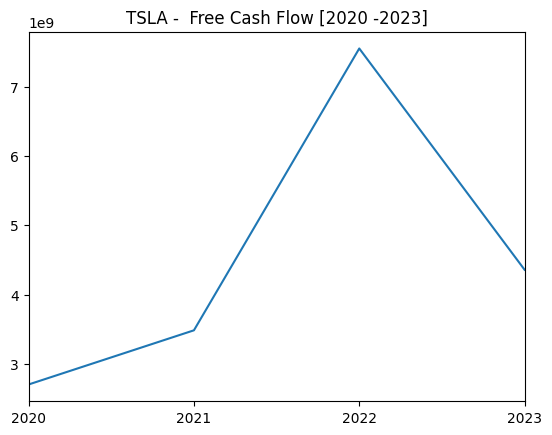

In [41]:
# ticker
ticker = "TSLA"

# ticker data
stock_symbol = yf.Ticker(ticker)

fcf = stock_symbol.cashflow.iloc[0]

# Plot cash flow
fcf.plot(title=f"{ticker} -  Free Cash Flow [2020 -2023]")

**_FCF : one of the indicators most frequently monitored by business people, banks, investors and other analysts_**

---
## **Question 7. [Exploratory] Time-driven strategy description around earnings releases**  

**Free text answer**

Explore earning dates for the whole month of April - e.g. using YahooFinance earnings calendar (https://finance.yahoo.com/calendar/earnings?from=2024-04-21&to=2024-04-27&day=2024-04-23).   

Compare with the previous closed earnings (e.g., recent dates with full data https://finance.yahoo.com/calendar/earnings?from=2024-04-07&to=2024-04-13&day=2024-04-08).   

Describe an analytical strategy/idea (you're not required to implement it) to select a subset companies of interest based on the future events data.

One potential analytical strategy to select a subset of companies of interest based on future earnings events data involves a combination of quantitative and qualitative analysis.  


- **Quantitative Filtering/Screening:**  
Start by filtering companies based on certain quantitative criteria such as market capitalization, revenue growth, earnings per share (EPS) growth, and historical stock price performance.  
Utilize financial screening tools or platforms to quickly identify companies that meet these criteria.   
Tools like Yahoo Finance, Finviz, or Stock Screener on investing.com can be helpful.  

<br>

- **Historical Earnings Performance Analysis:**  
Examine the historical earnings performance of companies over the past several quarters or years.   
Look for patterns such as consistent earnings beats, growth trends, or improving margins.  
Identify companies with a track record of meeting or exceeding earnings expectations as they may indicate strong underlying fundamentals and management performance.  

<br>

- **Sector and Industry Analysis:**  
Analyze the broader sector and industry trends to identify sectors or industries that are expected to perform well in the upcoming earnings season.  
Consider macroeconomic factors, industry-specific events, regulatory changes, and competitive landscape dynamics that could impact sector and industry performance.  

<br>

- **Event-driven Analysis:**  
Pay attention to any specific events or catalysts that could influence the earnings performance of companies in the upcoming quarter.   
This could include product launches, regulatory approvals, mergers and acquisitions, or management changes.  
Evaluate how these events might impact revenue, expenses, margins, and overall profitability.  

<br>

- **Risk Assessment:**  
Assess the risk factors associated with each company including financial leverage, liquidity position, competitive threats, and industry-specific risks.  
Use risk management tools and techniques such as scenario analysis, sensitivity analysis, or stress testing to quantify and mitigate risks.  

<br>

- **Qualitative Analysis:**  
Conduct qualitative analysis by reviewing company presentations, analyst reports, management interviews, and industry publications.  
Evaluate factors such as corporate governance practices, innovation capabilities, customer satisfaction, and brand reputation.  

<br>

- **Portfolio Optimization:**  
Once you have identified a subset of companies of interest, construct a diversified portfolio that balances risk and return objectives.  
Consider factors such as correlation, volatility, and beta when optimizing the portfolio allocation.  

<br>

By combining these analytical approaches, investors can effectively select a subset of companies with the potential to outperform in the upcoming earnings season.   
However, it's important to note that this strategy requires continuous monitoring and adjustment based on new information and changing market conditions.